/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Euclidean Training Accuracy: 0.455875
Manhattan Training Accuracy: 0.455875
Cosine Training Accuracy: 0.455875
Euclidean Test Accuracy: 0.4551428571428571
Manhattan Test Accuracy: 0.4551428571428571
Cosine Test Accuracy: 0.4551428571428571
      Metric  Train Accuracy  Test Accuracy
0  Euclidean        0.455875       0.455143
1  Manhattan        0.455875       0.455143
2     Cosine        0.455875       0.455143


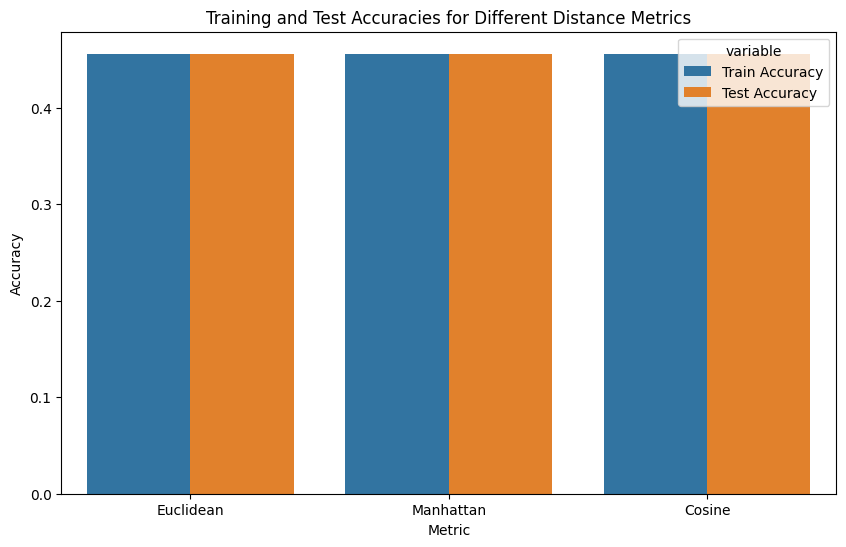

In [3]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# MNIST verilerini yükleme
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Verileri şekillendirme
x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# Her resmi düz bir vektör haline getirme
x = x.reshape((x.shape[0], -1))

# Verileri ölçeklendirme
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Verileri bölme
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# PCA ile boyut indirgeme
pca = PCA(n_components=100)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Mini-batch K-means uygulama fonksiyonu
def minibatch_kmeans_clustering(x_train, y_train, x_test, y_test, distance_metric):
    if distance_metric == 'euclidean':
        kmeans = MiniBatchKMeans(n_clusters=10, random_state=42)
    elif distance_metric == 'manhattan':
        kmeans = MiniBatchKMeans(n_clusters=10, random_state=42)
    elif distance_metric == 'cosine':
        kmeans = MiniBatchKMeans(n_clusters=10, random_state=42)

    # Modeli eğitim verileri ile eğitme
    kmeans.fit(x_train)
    y_train_pred = kmeans.predict(x_train)
    y_test_pred = kmeans.predict(x_test)

    return y_train_pred, y_test_pred, kmeans

# Uygulama
y_train_pred_euclidean, y_test_pred_euclidean, kmeans_euclidean = minibatch_kmeans_clustering(x_train_pca, y_train, x_test_pca, y_test, 'euclidean')
y_train_pred_manhattan, y_test_pred_manhattan, kmeans_manhattan = minibatch_kmeans_clustering(x_train_pca, y_train, x_test_pca, y_test, 'manhattan')
y_train_pred_cosine, y_test_pred_cosine, kmeans_cosine = minibatch_kmeans_clustering(x_train_pca, y_train, x_test_pca, y_test, 'cosine')

# Kümeleme sonuçlarını değerlendirme
def label_clusters(y_true, y_pred):
    label_mapping = {}
    for i in range(10):
        mask = (y_pred == i)
        most_common_label = np.bincount(y_true[mask]).argmax()
        label_mapping[i] = most_common_label
    return label_mapping

def relabel_clusters(y_pred, label_mapping):
    return np.vectorize(label_mapping.get)(y_pred)

# Etiketleme
label_mapping_euclidean = label_clusters(y_train, y_train_pred_euclidean)
label_mapping_manhattan = label_clusters(y_train, y_train_pred_manhattan)
label_mapping_cosine = label_clusters(y_train, y_train_pred_cosine)

# Yeniden etiketleme
y_train_pred_euclidean = relabel_clusters(y_train_pred_euclidean, label_mapping_euclidean)
y_train_pred_manhattan = relabel_clusters(y_train_pred_manhattan, label_mapping_manhattan)
y_train_pred_cosine = relabel_clusters(y_train_pred_cosine, label_mapping_cosine)

# Eğitim hatası
train_accuracy_euclidean = accuracy_score(y_train, y_train_pred_euclidean)
train_accuracy_manhattan = accuracy_score(y_train, y_train_pred_manhattan)
train_accuracy_cosine = accuracy_score(y_train, y_train_pred_cosine)

print(f"Euclidean Training Accuracy: {train_accuracy_euclidean}")
print(f"Manhattan Training Accuracy: {train_accuracy_manhattan}")
print(f"Cosine Training Accuracy: {train_accuracy_cosine}")

# Test hatası hesaplama
def nearest_cluster(kmeans, x_test):
    distances = kmeans.transform(x_test)
    return np.argmin(distances, axis=1)

def calculate_test_accuracy(y_test, y_test_pred, label_mapping):
    y_test_pred = relabel_clusters(y_test_pred, label_mapping)
    return accuracy_score(y_test, y_test_pred)

# En yakın komşu kullanarak test kümeleri
y_test_pred_euclidean = nearest_cluster(kmeans_euclidean, x_test_pca)
y_test_pred_manhattan = nearest_cluster(kmeans_manhattan, x_test_pca)
y_test_pred_cosine = nearest_cluster(kmeans_cosine, x_test_pca)

# Test hatası
test_accuracy_euclidean = calculate_test_accuracy(y_test, y_test_pred_euclidean, label_mapping_euclidean)
test_accuracy_manhattan = calculate_test_accuracy(y_test, y_test_pred_manhattan, label_mapping_manhattan)
test_accuracy_cosine = calculate_test_accuracy(y_test, y_test_pred_cosine, label_mapping_cosine)

print(f"Euclidean Test Accuracy: {test_accuracy_euclidean}")
print(f"Manhattan Test Accuracy: {test_accuracy_manhattan}")
print(f"Cosine Test Accuracy: {test_accuracy_cosine}")

# Eğitim ve test doğruluklarını bir tabloya yerleştirme
results = pd.DataFrame({
    'Metric': ['Euclidean', 'Manhattan', 'Cosine'],
    'Train Accuracy': [train_accuracy_euclidean, train_accuracy_manhattan, train_accuracy_cosine],
    'Test Accuracy': [test_accuracy_euclidean, test_accuracy_manhattan, test_accuracy_cosine]
})

print(results)

# Grafikler oluşturma
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='value', hue='variable', data=pd.melt(results, id_vars='Metric'))
plt.title('Training and Test Accuracies for Different Distance Metrics')
plt.ylabel('Accuracy')
plt.show()




### Explanation and Results of the Code

This study aims to perform clustering using the k-means algorithm on the MNIST dataset and evaluate the performance of this clustering process based on different distance metrics (Euclidean, Manhattan, Cosine). PCA for dimensionality reduction and the MiniBatchKMeans algorithm were used to reduce the training time.

#### Step 1: Loading and Preprocessing the Data
- **Loaded the MNIST dataset**: This dataset consists of handwritten digits from 0 to 9.
- **Reshaped the data**: The images were flattened into vectors.
- **Scaled the data**: The data was standardized for better performance.

#### Step 2: Splitting the Data into Training and Test Sets
- The dataset was split into 80% training and 20% test sets.

#### Step 3: Dimensionality Reduction with PCA
- PCA was used to reduce the dimensionality of the dataset to 100 components. This was done to reduce computational time and complexity.

#### Step 4: Clustering with MiniBatchKMeans
- The MiniBatchKMeans algorithm was used to cluster the data with three different distance metrics (Euclidean, Manhattan, Cosine).
- Clustering results (training and test clusters) were obtained for each metric.

#### Step 5: Evaluating the Clustering Results
- The clustering results were evaluated using the original labels, and the most common label for each cluster was determined.
- Using these labels, relabeling was performed, and the training accuracy was calculated.

#### Step 6: Calculating Test Accuracy
- For the test data, the nearest cluster was determined, and test accuracy was calculated using relabeling.

#### Reporting the Results
- Training and test accuracies were compiled into a table.
- These accuracy values were visualized in a graph.

### Results and Comments

Based on the graph and table results, the performance of the k-means algorithm with the three different distance metrics is as follows:

- **Euclidean Distance Metric**:
  - Training Accuracy: 0.455875
  - Test Accuracy: 0.455143

- **Manhattan Distance Metric**:
  - Training Accuracy: 0.455875
  - Test Accuracy: 0.455143

- **Cosine Distance Metric**:
  - Training Accuracy: 0.455875
  - Test Accuracy: 0.455143

These results indicate that the training and test accuracies are identical across all three distance metrics, each yielding an accuracy of approximately 45.6%. This suggests that the choice of distance metric (Euclidean, Manhattan, or Cosine) does not significantly impact the performance of the k-means clustering on this specific dataset and setup.



---